In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [2]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_ann"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_midHolocene_tas_spatialmean_ann.nc',
 'PMIP3_historical_tas_spatialmean_ann.nc',
 'PMIP3_1pctCO2_tas_spatialmean_ann.nc',
 'PMIP4_observations_tas_spatialmean_ann.nc',
 'PMIP4_lgm_tas_spatialmean_ann.nc',
 'PMIP4_midHolocene_tas_spatialmean_ann.nc',
 'PMIP3_lgm_tas_spatialmean_ann.nc',
 'PMIP4_1pctCO2_tas_spatialmean_ann.nc',
 'PMIP3_observations_tas_spatialmean_ann.nc',
 'PMIP4_historical_tas_spatialmean_ann.nc',
 'PMIP3_midPliocene-eoi400_tas_spatialmean_ann.nc',
 'PMIP4_piControl_tas_spatialmean_ann.nc',
 'PMIP4_abrupt4xCO2_tas_spatialmean_ann.nc',
 'PMIP4_lig127k_tas_spatialmean_ann.nc',
 'PMIP4_midPliocene-eoi400_tas_spatialmean_ann.nc',
 'PMIP3_lig127k_tas_spatialmean_ann.nc',
 'PMIP3_abrupt4xCO2_tas_spatialmean_ann.nc',
 'PMIP3_piControl_tas_spatialmean_ann.nc']

In [3]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-10,10]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 30] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, 1.0225, filename, va='bottom', ha='center', 
        rotation='horizontal', rotation_mode='anchor', fontweight='bold', fontsize='14',
        transform=ax.transAxes)
    ax.text(0.5, -0.25, 'Mean Annual SST ($^\circ$C)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[-46.63904589, -46.62289522, -46.60921582, ..., -46.65350277,
         -46.64899568, -46.63904589],
        [-45.43736833, -45.37900118, -45.3276028 , ..., -45.50249613,
         -45.47745169, -45.43736833],
        [-42.34151417, -42.23429361, -42.1229012 , ..., -42.49705171,
         -42.42610863, -42.34151417],
        ...,
        [-20.60193875, -20.60603099, -20.609777  , ..., -20.59506698,
         -20.59821856, -20.60193875],
        [-20.57612909, -20.57867579, -20.58109693, ..., -20.57161706,
         -20.5737621 , -20.57612909],
        [-20.61960318, -20.62035589, -20.6211259 , ..., -20.61827268,
         -20.61891085, -20.61960318]],
  mask=False,
  fill_value=1e+20)

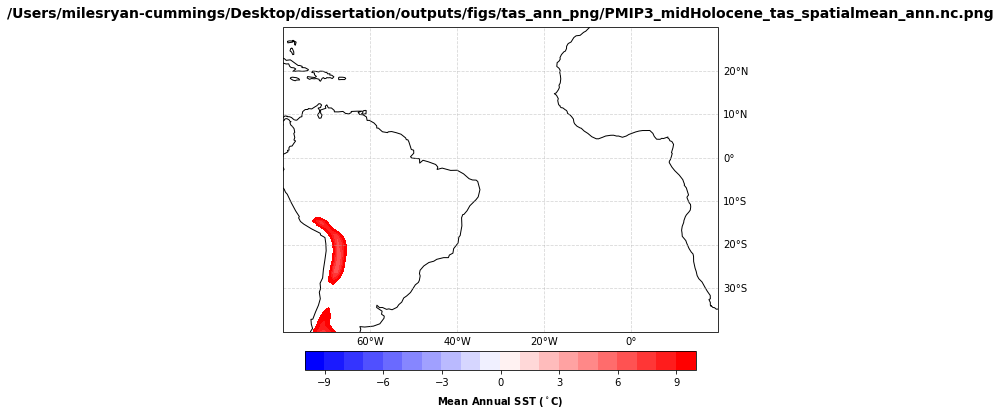

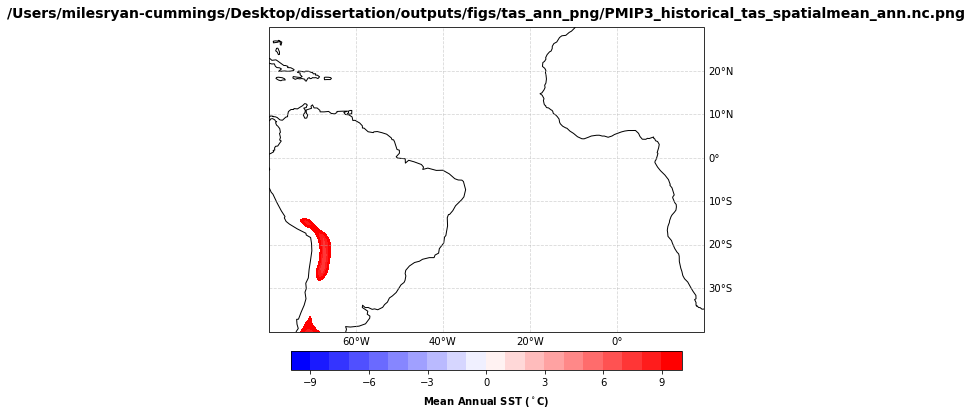

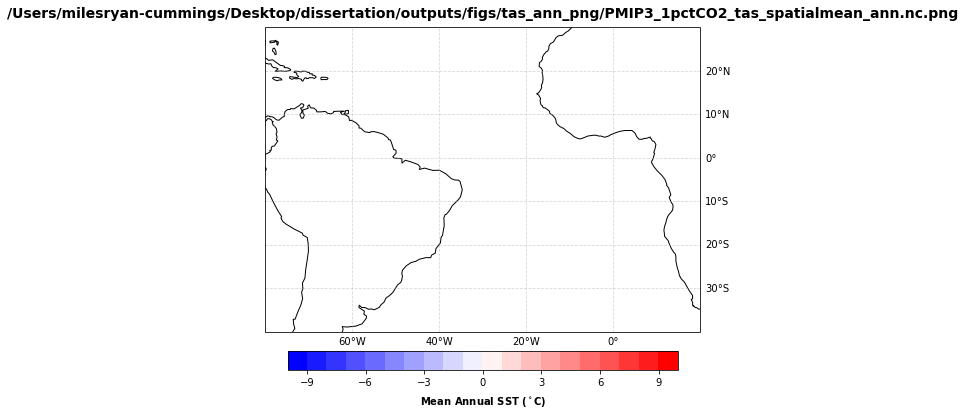

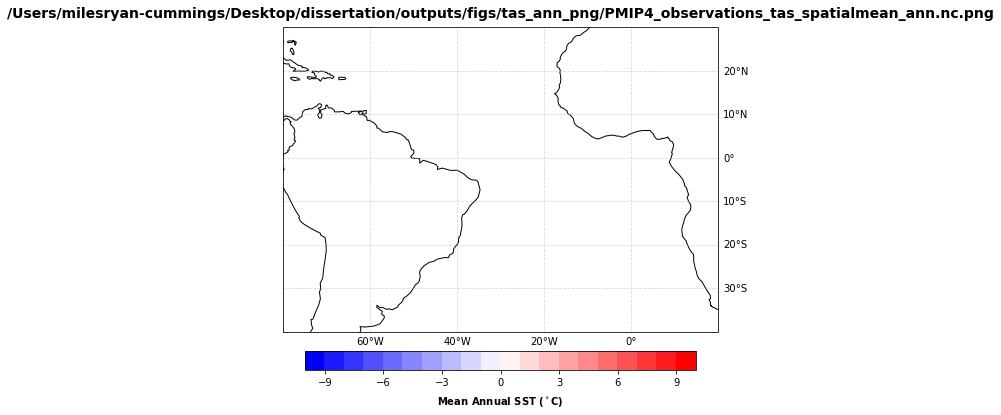

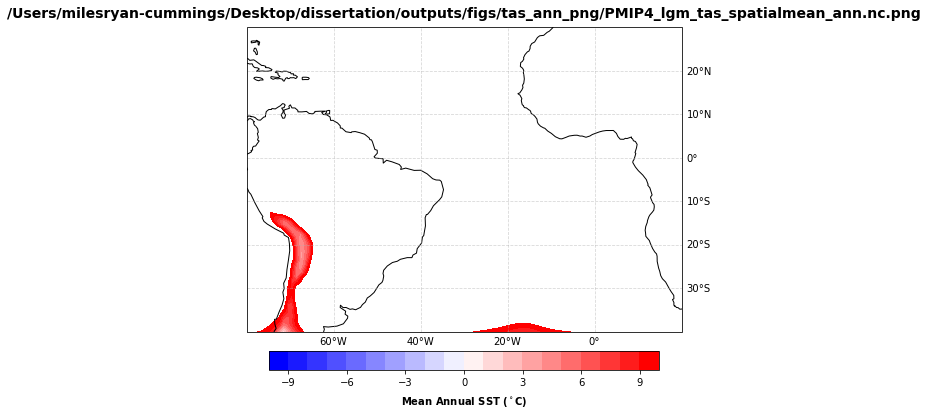

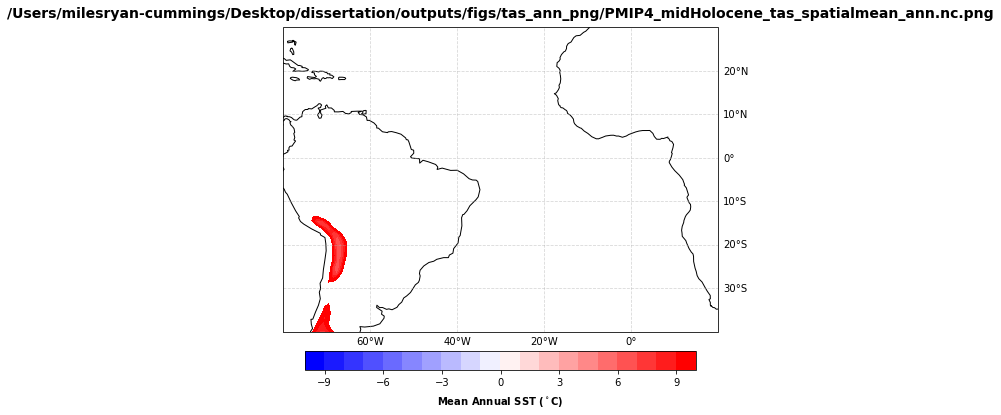

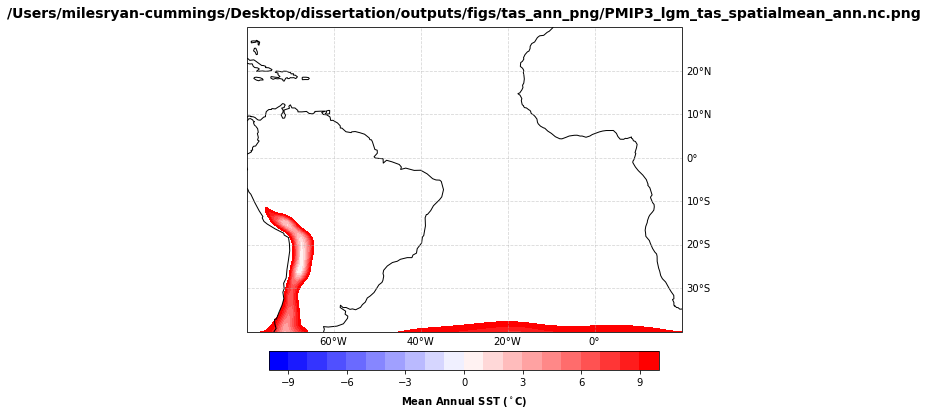

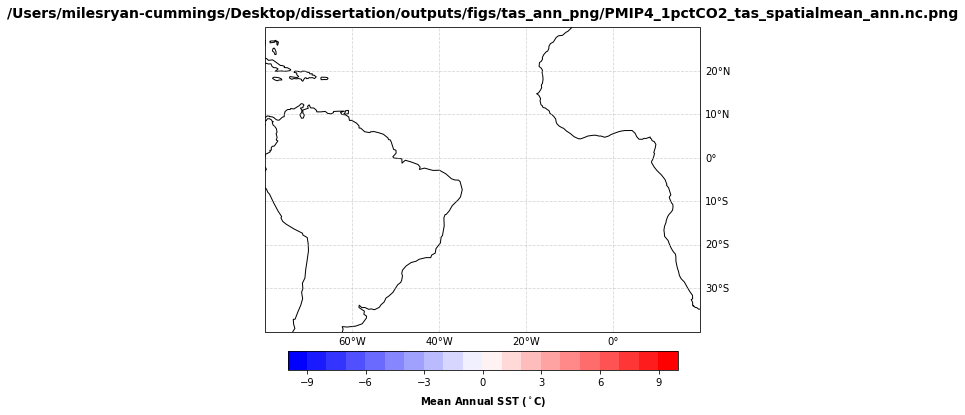

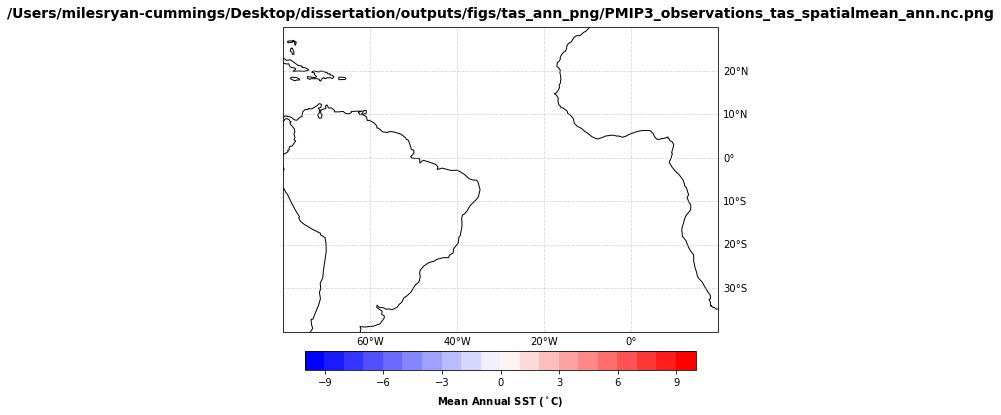

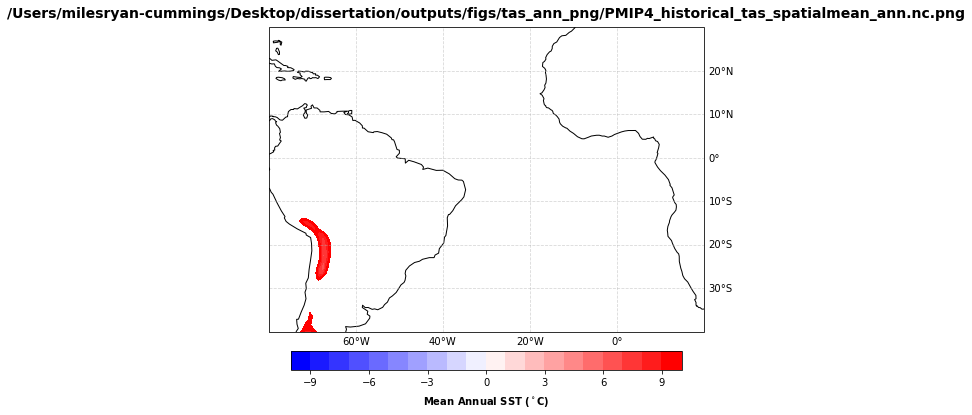

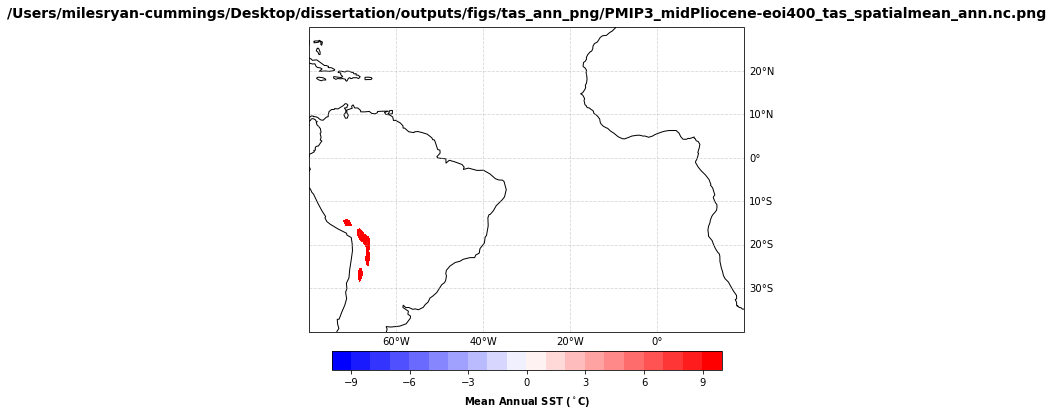

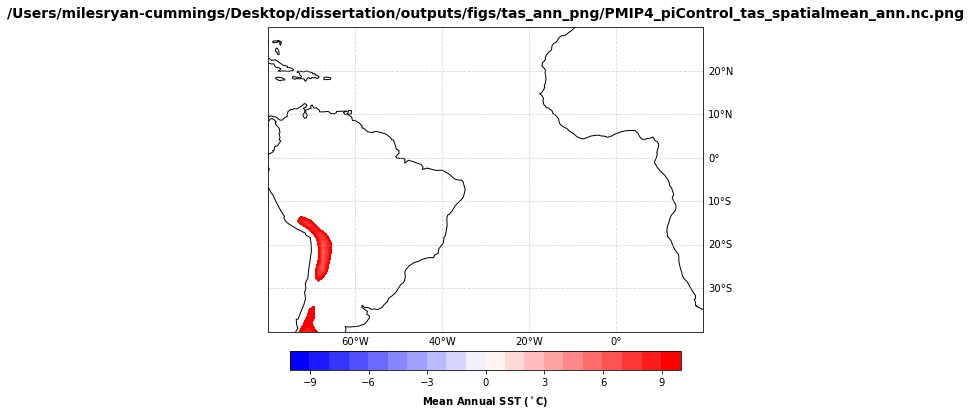

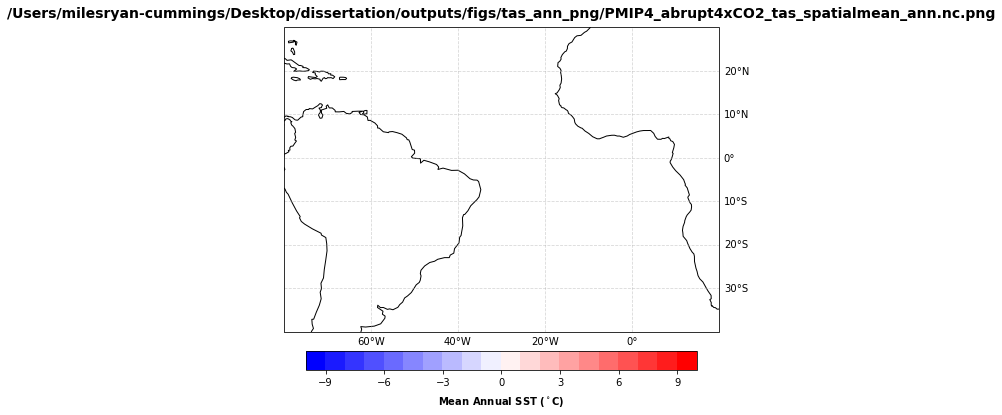

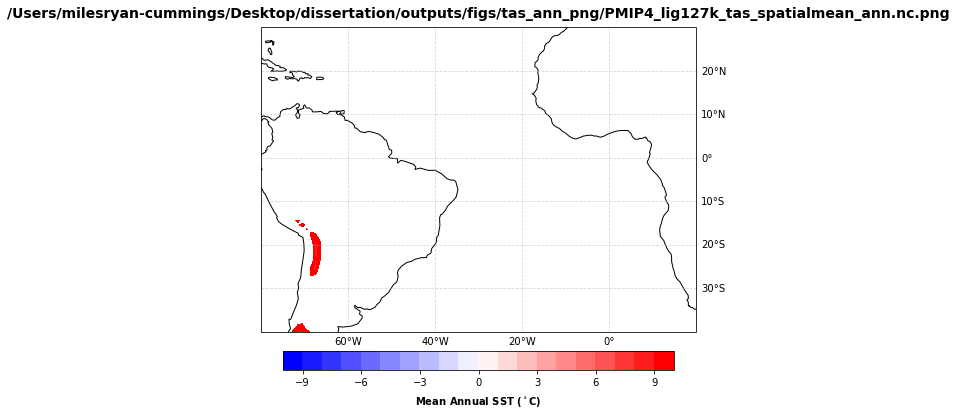

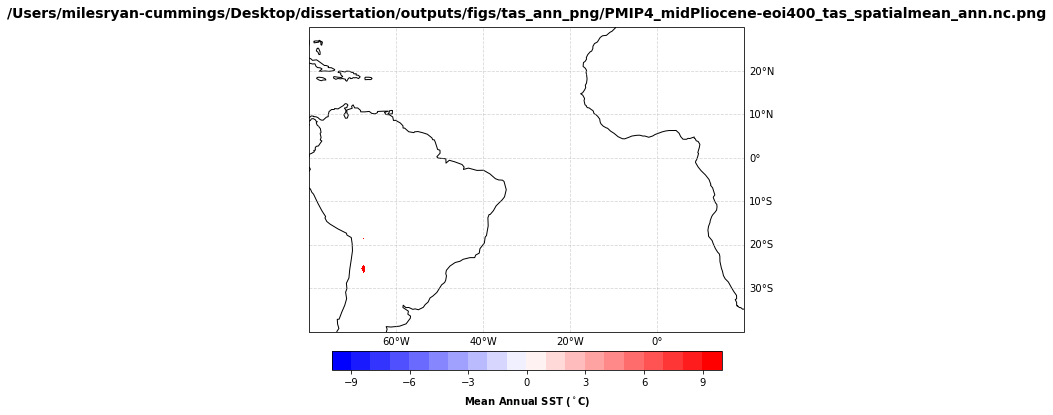

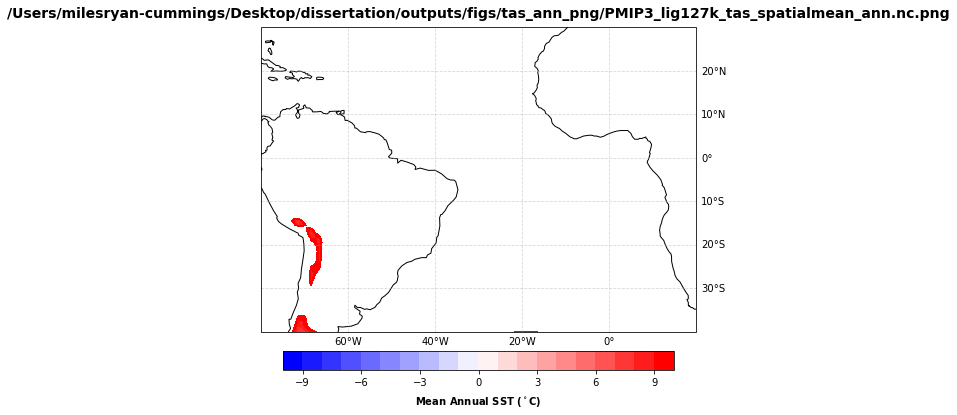

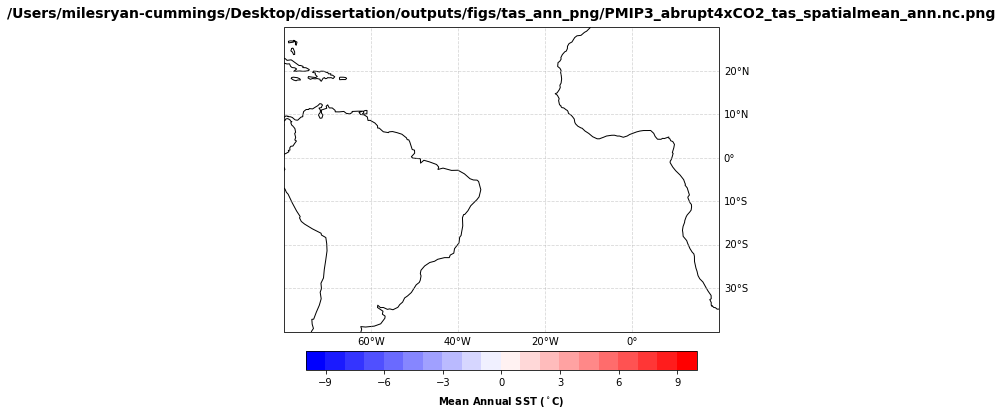

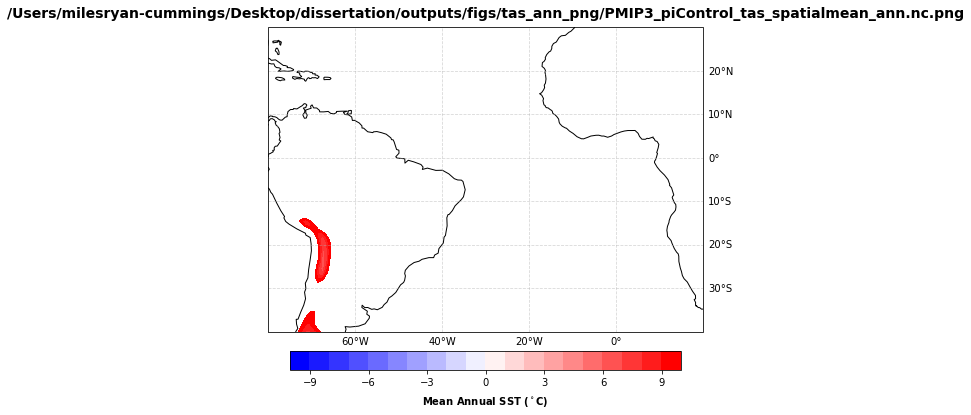

In [4]:
#open datasets
variable_name= 'tas_spatialmean_ann'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_ann/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/tas_ann_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [5]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_1pctCO2_tas_spatialmean_djf.nc',
 'PMIP3_midHolocene_tas_spatialmean_djf.nc',
 'PMIP3_historical_tas_spatialmean_djf.nc',
 'PMIP4_observations_tas_spatialmean_djf.nc',
 'PMIP4_lgm_tas_spatialmean_djf.nc',
 'PMIP4_midHolocene_tas_spatialmean_djf.nc',
 'PMIP4_1pctCO2_tas_spatialmean_djf.nc',
 'PMIP3_lgm_tas_spatialmean_djf.nc',
 'PMIP3_midPliocene-eoi400_tas_spatialmean_djf.nc',
 'PMIP3_observations_tas_spatialmean_djf.nc',
 'PMIP4_historical_tas_spatialmean_djf.nc',
 'PMIP4_piControl_tas_spatialmean_djf.nc',
 'PMIP4_abrupt4xCO2_tas_spatialmean_djf.nc',
 'PMIP4_lig127k_tas_spatialmean_djf.nc',
 'PMIP4_midPliocene-eoi400_tas_spatialmean_djf.nc',
 'PMIP3_abrupt4xCO2_tas_spatialmean_djf.nc',
 'PMIP3_lig127k_tas_spatialmean_djf.nc',
 'PMIP3_piControl_tas_spatialmean_djf.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[-29.99471886, -29.98514492, -29.97496868, ..., -30.00052879,
         -29.99911876, -29.99471886],
        [-29.60722502, -29.57246744, -29.54384037, ..., -29.64213238,
         -29.62990601, -29.60722502],
        [-28.07872955, -28.01503905, -27.94981369, ..., -28.16865325,
         -28.12938236, -28.07872955],
        ...,
        [-35.86061651, -35.86498389, -35.86932019, ..., -35.85303741,
         -35.85663189, -35.86061651],
        [-35.85329488, -35.85618243, -35.85904159, ..., -35.84773106,
         -35.85048706, -35.85329488],
        [-35.90886554, -35.90974121, -35.9106502 , ..., -35.90706367,
         -35.90797701, -35.90886554]],
  mask=False,
  fill_value=1e+20)

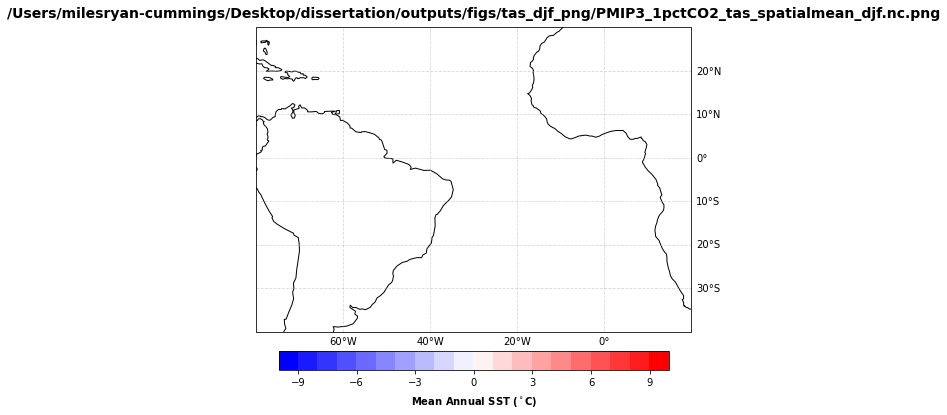

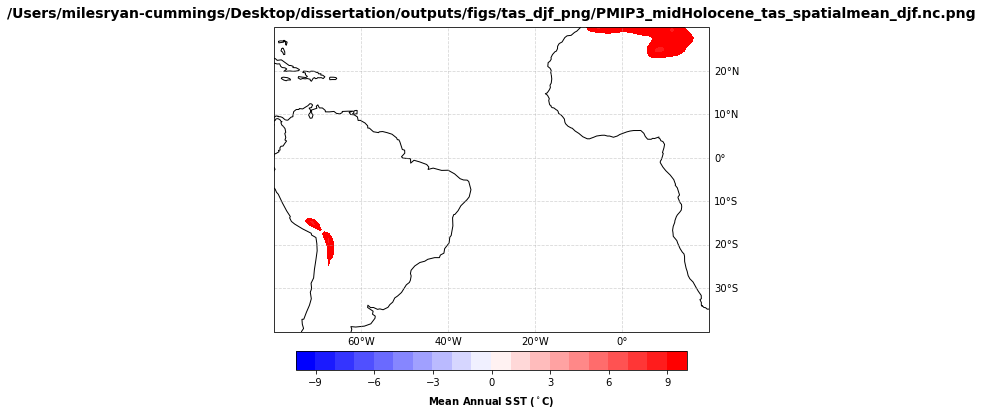

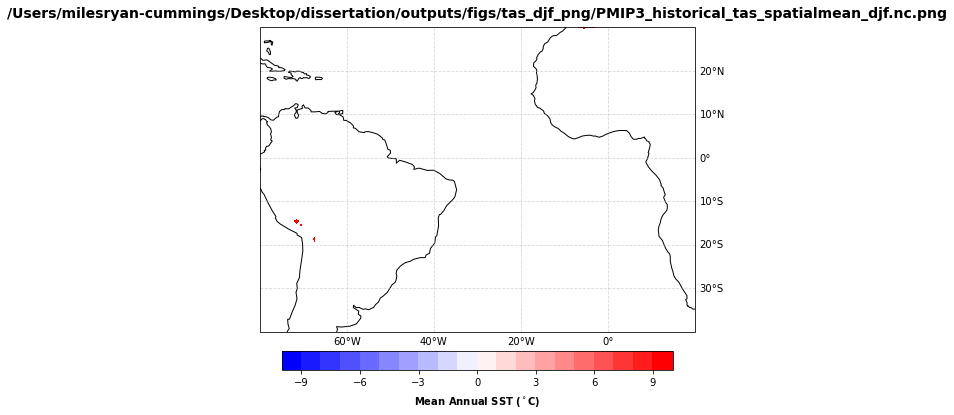

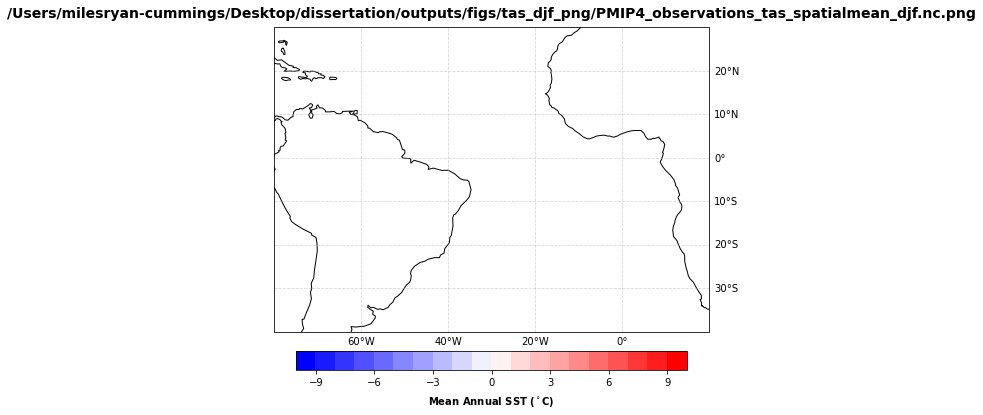

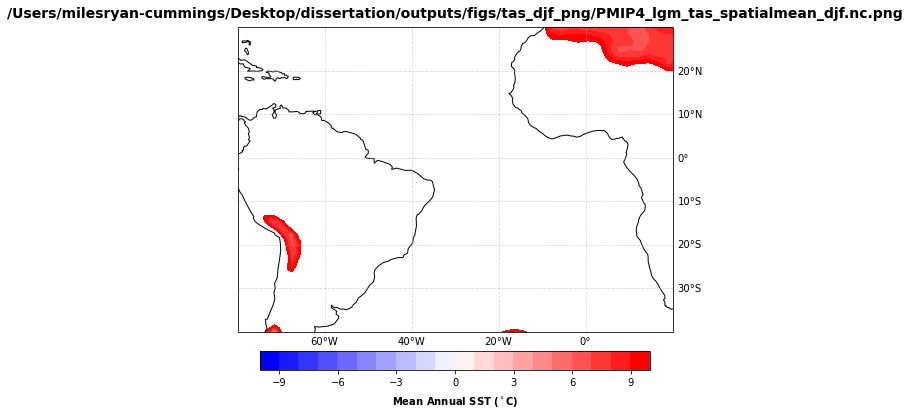

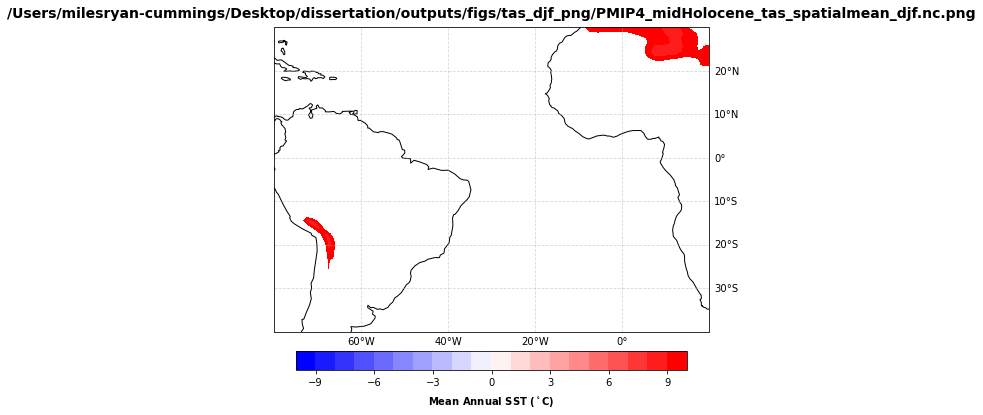

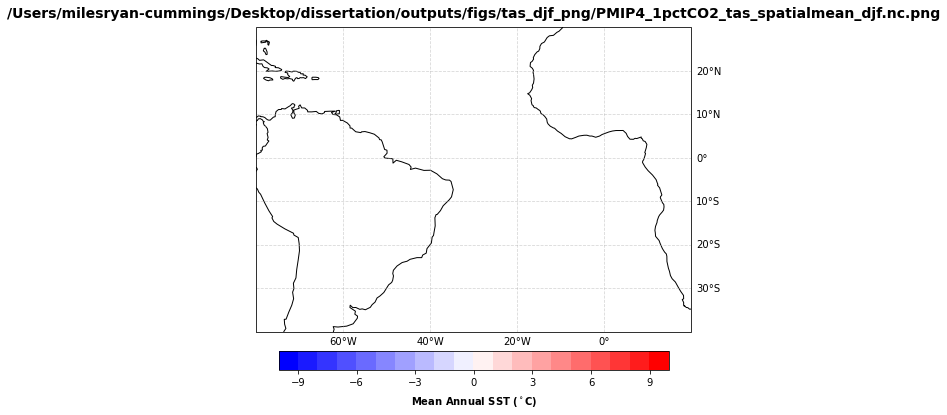

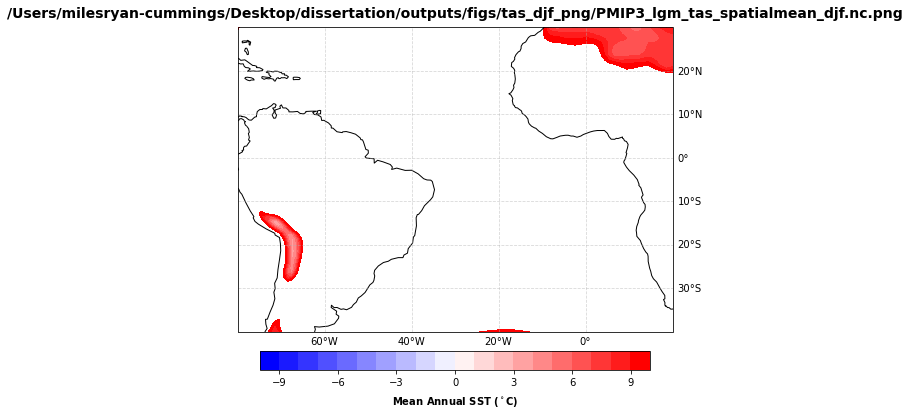

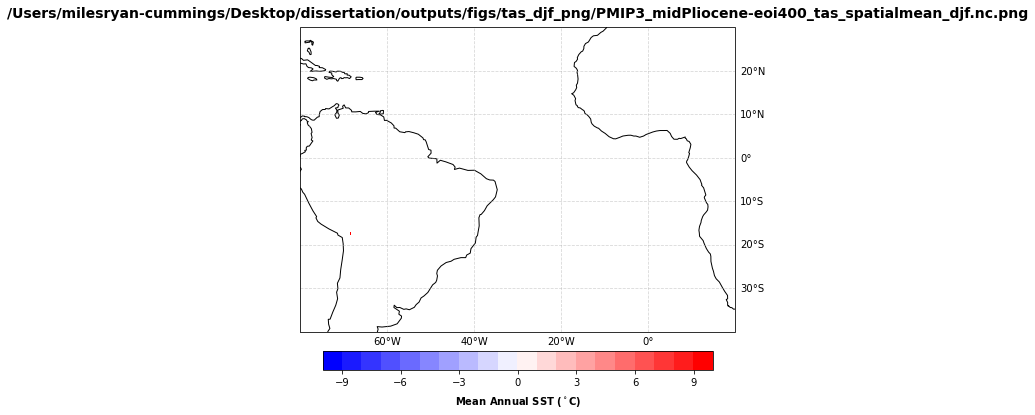

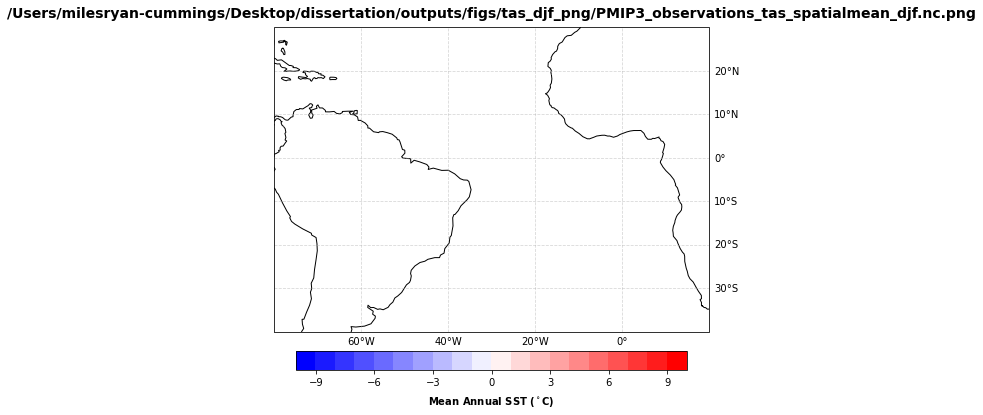

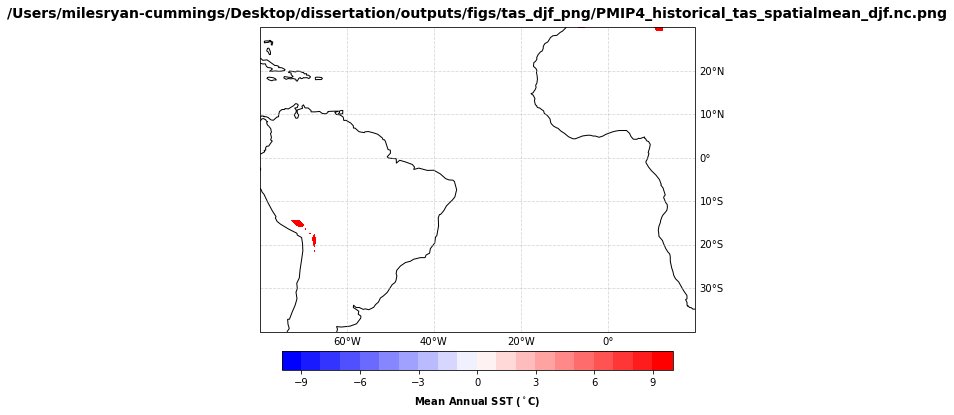

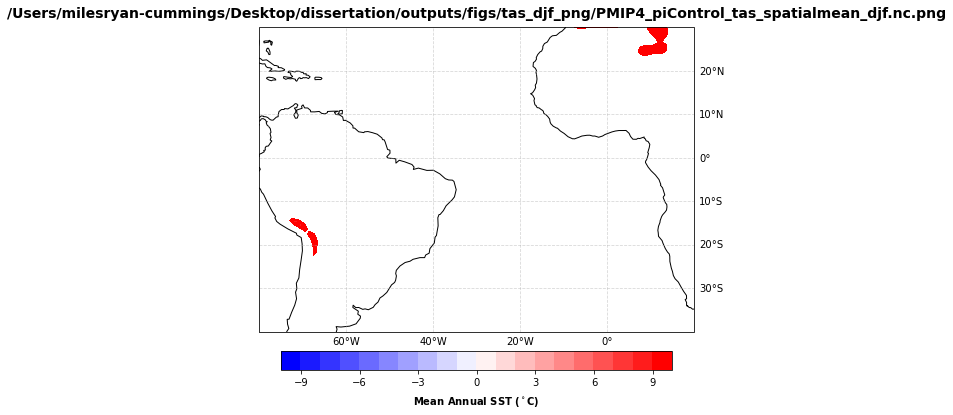

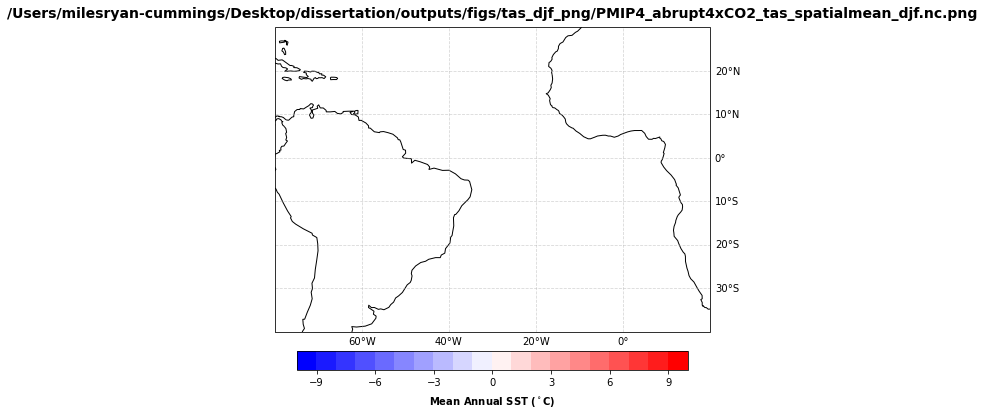

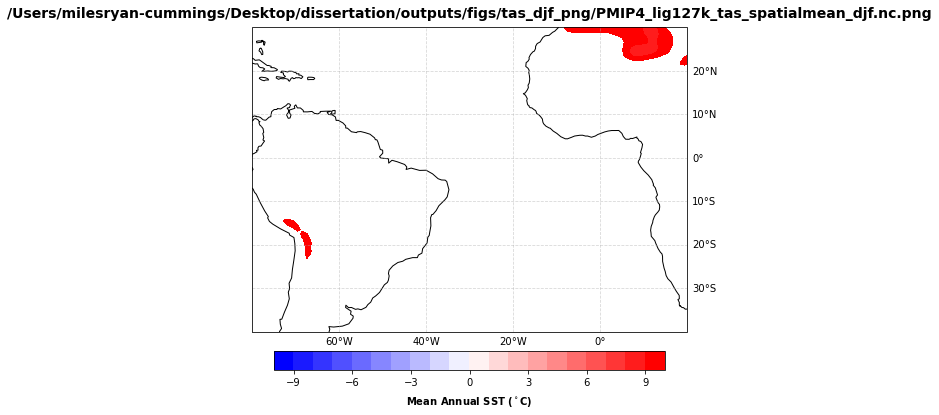

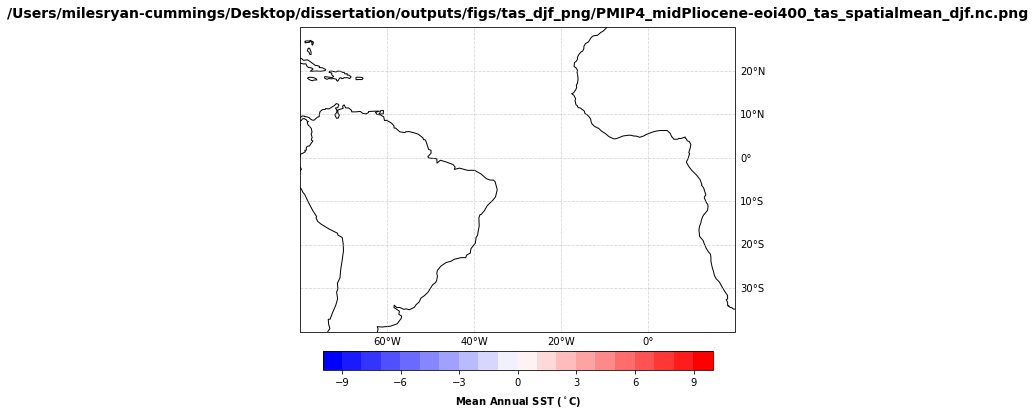

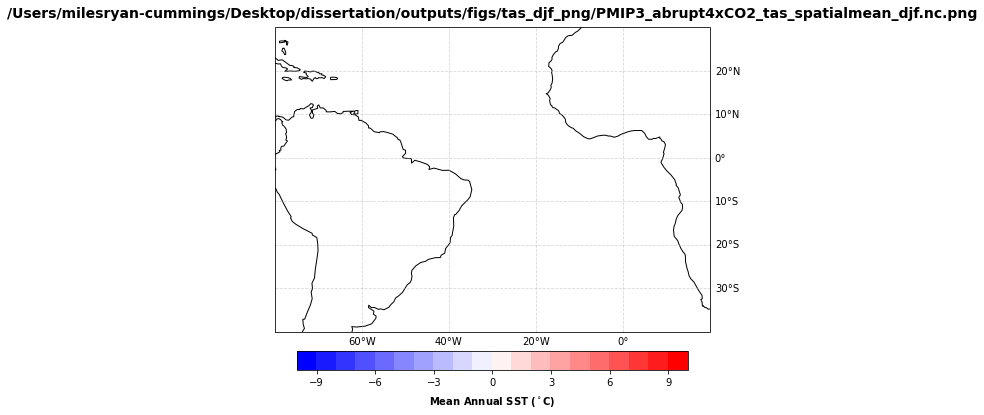

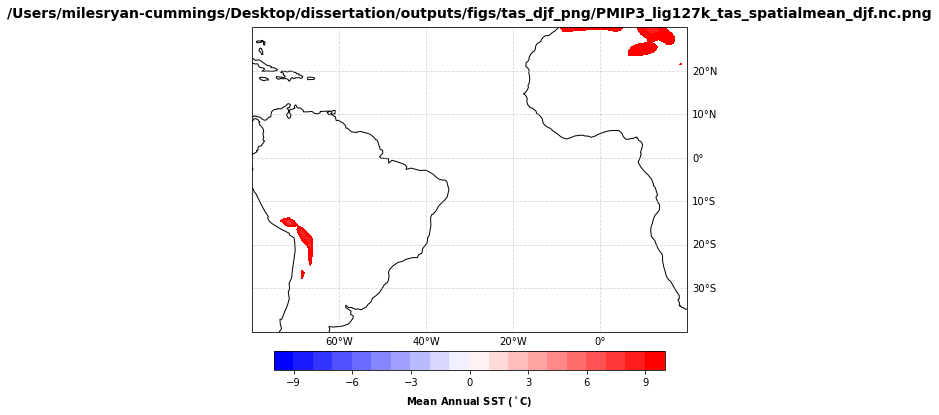

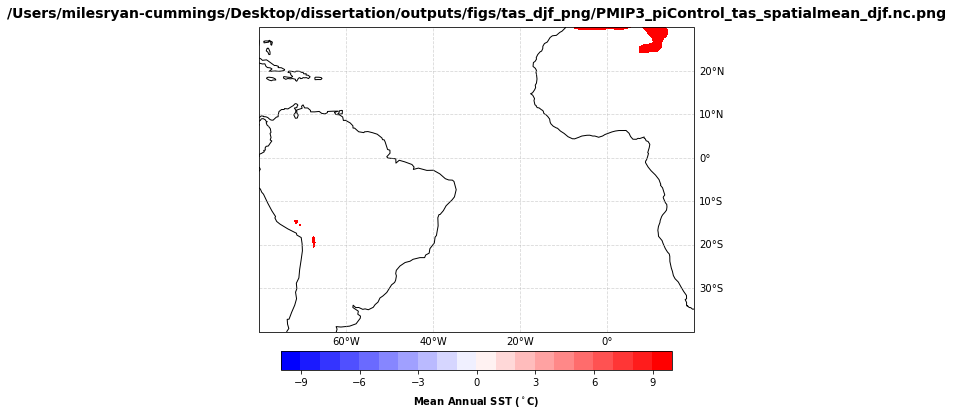

In [6]:
#open datasets
variable_name= 'tas_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/tas_djf_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [7]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_historical_tas_spatialmean_jja.nc',
 'PMIP3_midHolocene_tas_spatialmean_jja.nc',
 'PMIP3_1pctCO2_tas_spatialmean_jja.nc',
 'PMIP3_lgm_tas_spatialmean_jja.nc',
 'PMIP4_1pctCO2_tas_spatialmean_jja.nc',
 'PMIP4_midHolocene_tas_spatialmean_jja.nc',
 'PMIP4_lgm_tas_spatialmean_jja.nc',
 'PMIP4_observations_tas_spatialmean_jja.nc',
 'PMIP4_midPliocene-eoi400_tas_spatialmean_jja.nc',
 'PMIP4_lig127k_tas_spatialmean_jja.nc',
 'PMIP4_historical_tas_spatialmean_jja.nc',
 'PMIP3_observations_tas_spatialmean_jja.nc',
 'PMIP3_midPliocene-eoi400_tas_spatialmean_jja.nc',
 'PMIP4_abrupt4xCO2_tas_spatialmean_jja.nc',
 'PMIP4_piControl_tas_spatialmean_jja.nc',
 'PMIP3_piControl_tas_spatialmean_jja.nc',
 'PMIP3_abrupt4xCO2_tas_spatialmean_jja.nc',
 'PMIP3_lig127k_tas_spatialmean_jja.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[-62.67608643, -62.67608643, -62.67608643, ..., -62.67608643,
         -62.67608643, -62.67608643],
        [-60.12343671, -60.00999362, -59.87631641, ..., -60.37383062,
         -60.23172676, -60.12343671],
        [-55.02095563, -54.67953391, -54.28029364, ..., -55.77080938,
         -55.34570623, -55.02095563],
        ...,
        [ -1.15970226,  -1.16021688,  -1.15997309, ...,  -1.1582083 ,
          -1.15895573,  -1.15970226],
        [ -1.20092704,  -1.20110176,  -1.20101631, ...,  -1.20043209,
          -1.20067811,  -1.20092704],
        [ -1.22155082,  -1.22155082,  -1.22155082, ...,  -1.22155082,
          -1.22155082,  -1.22155082]],
  mask=False,
  fill_value=1e+20)

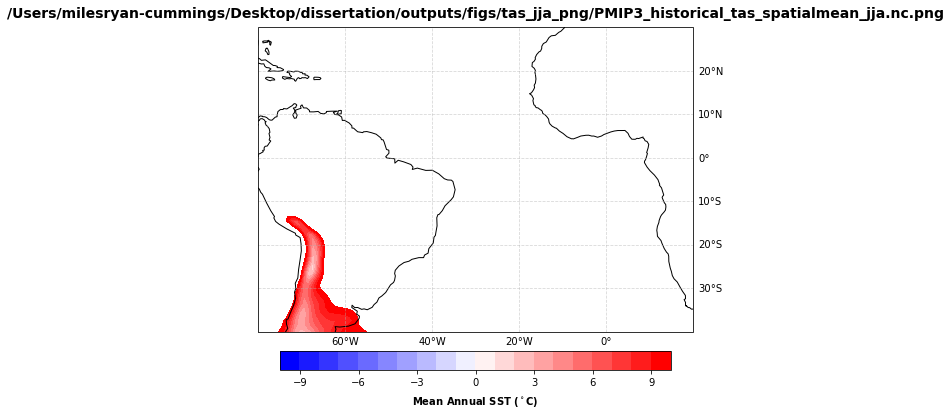

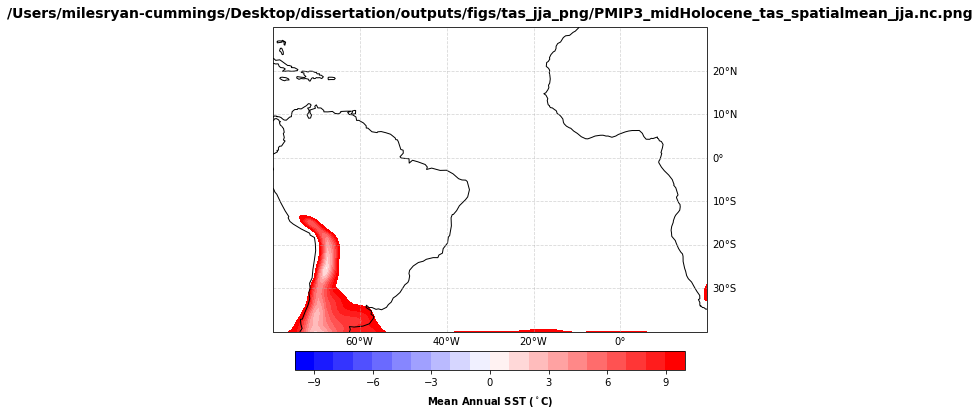

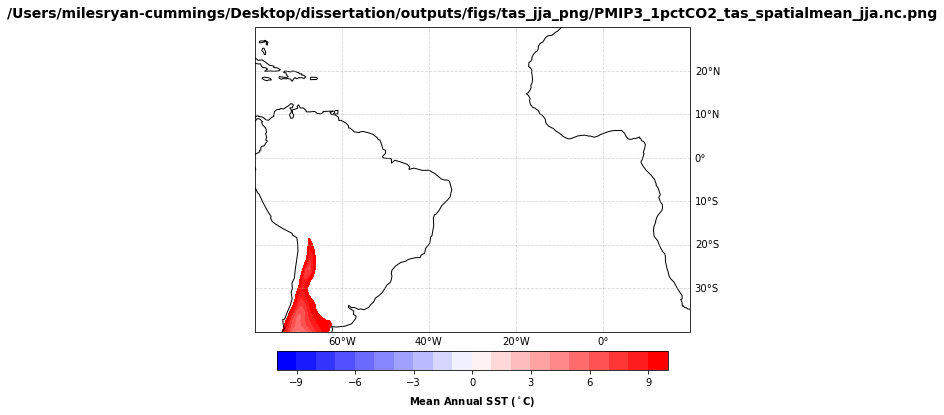

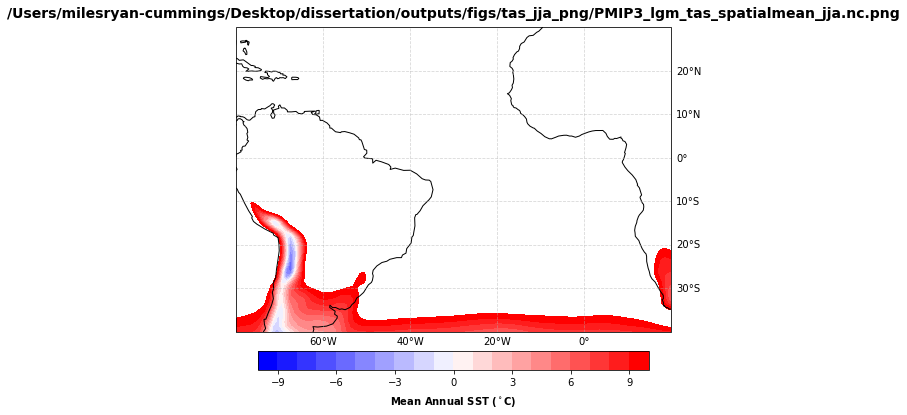

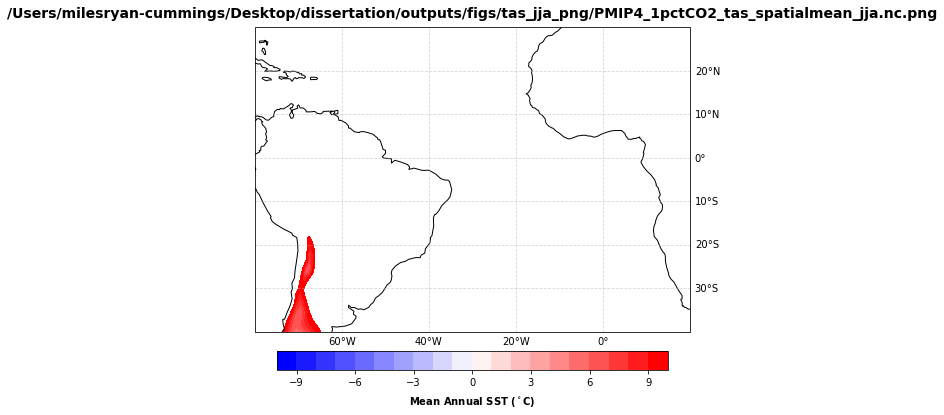

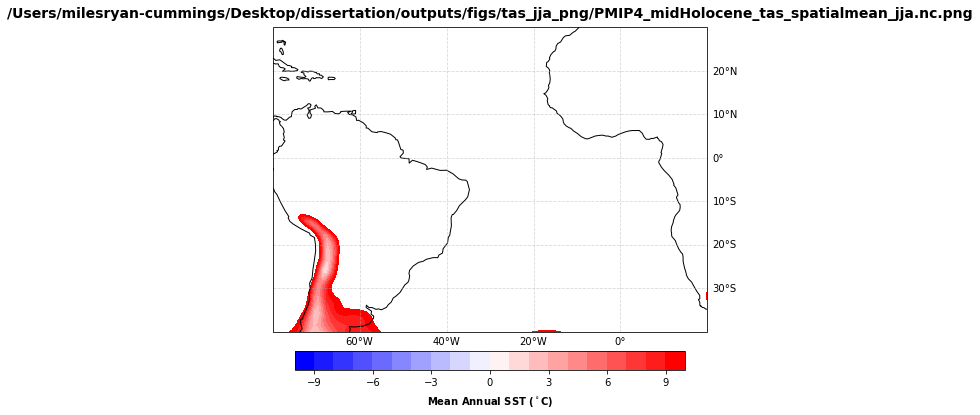

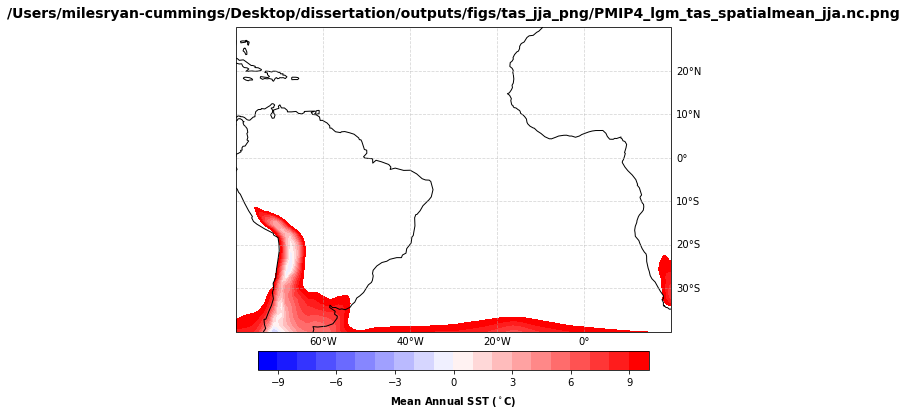

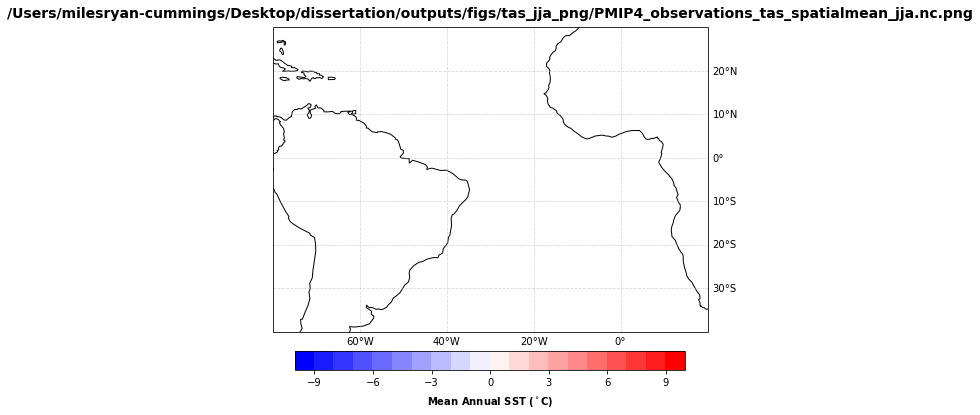

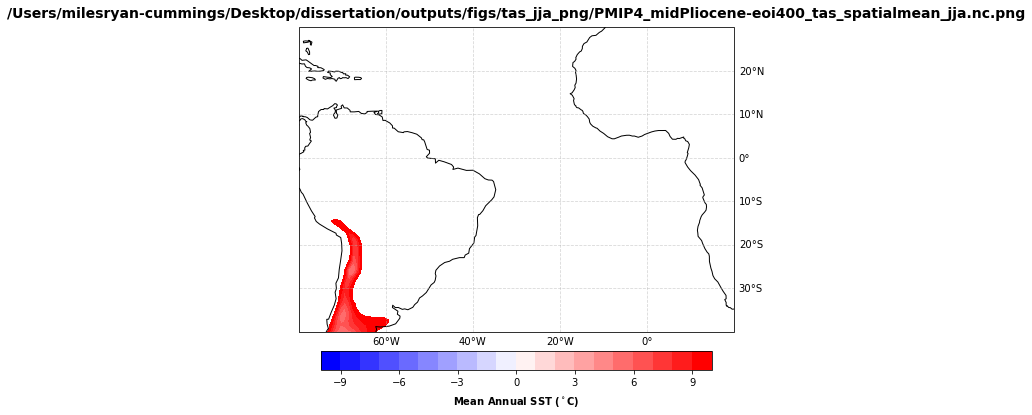

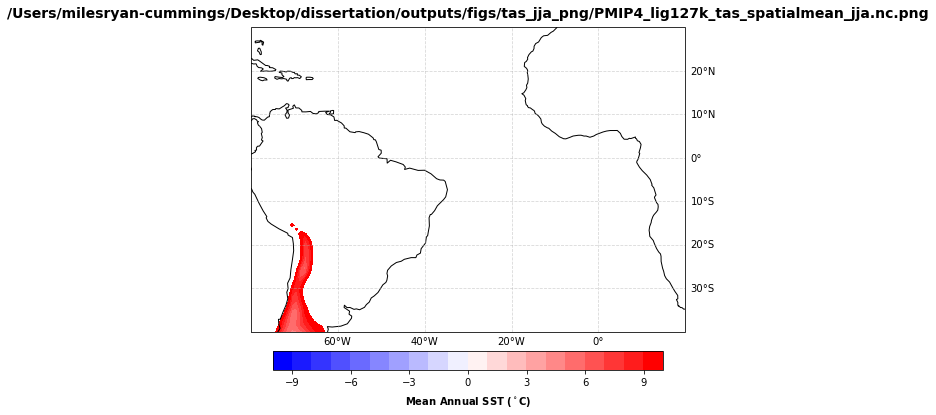

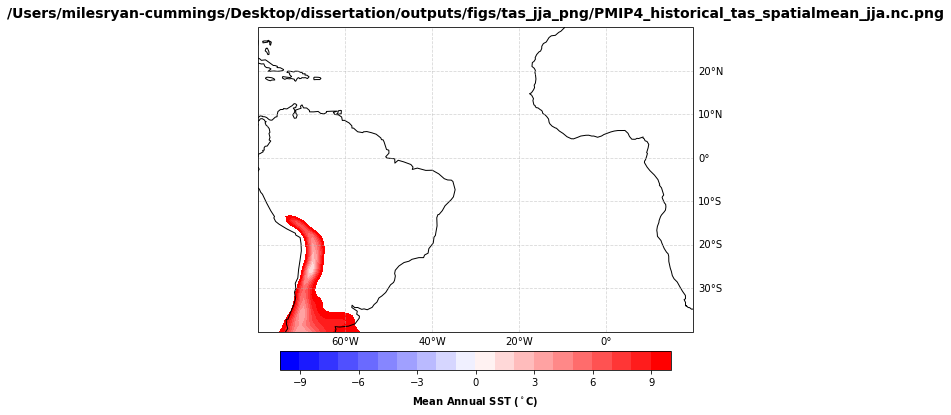

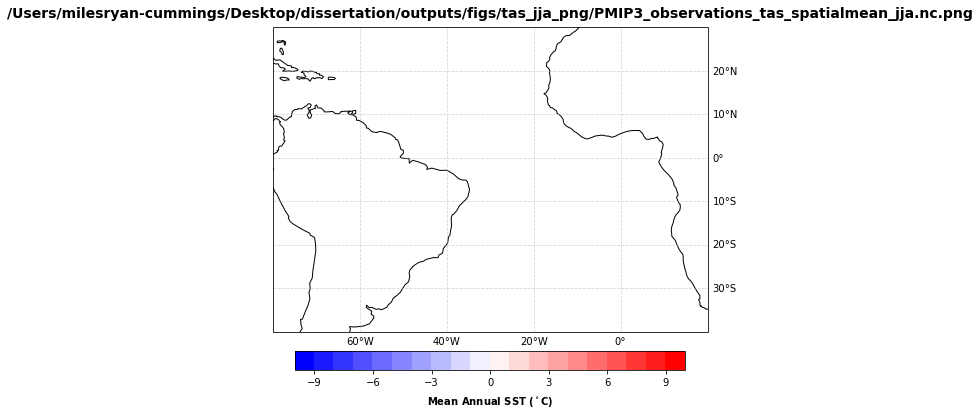

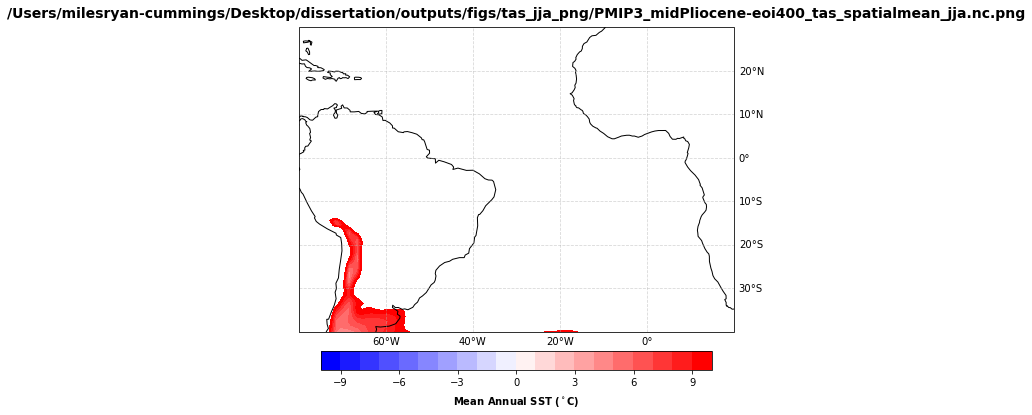

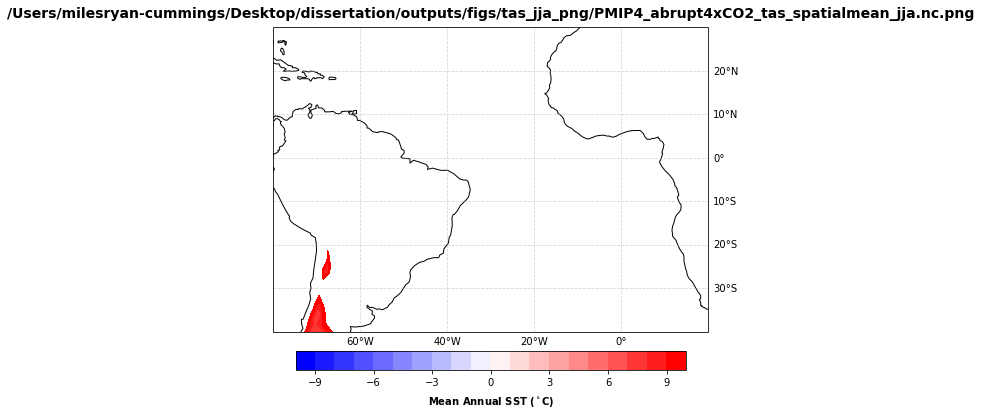

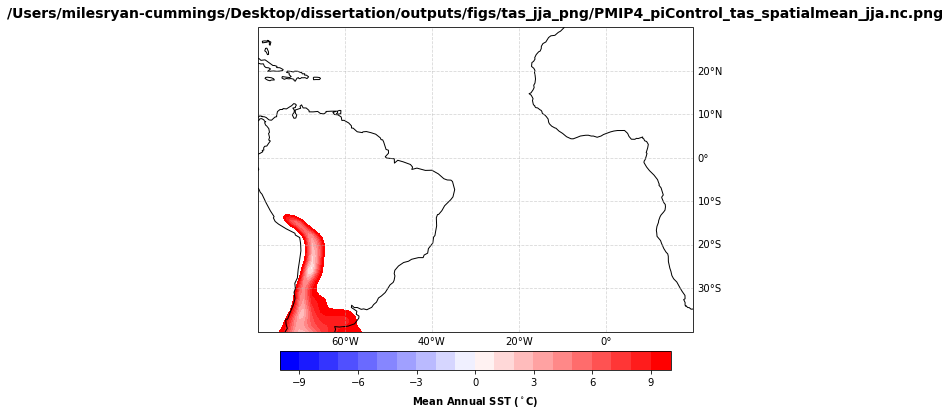

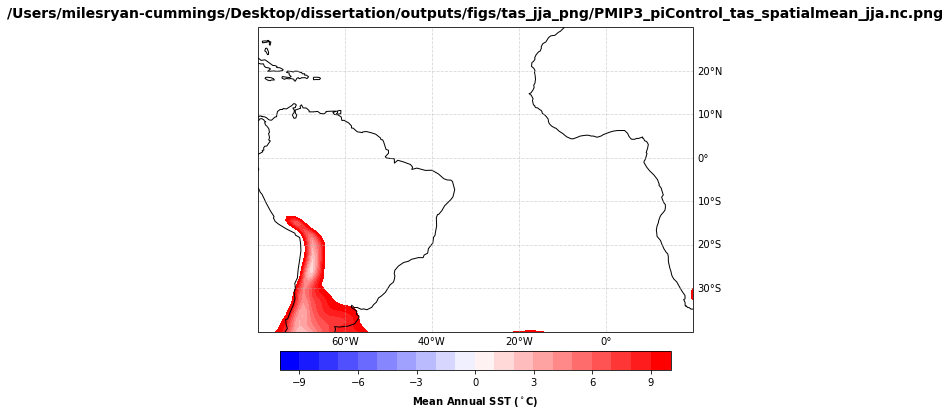

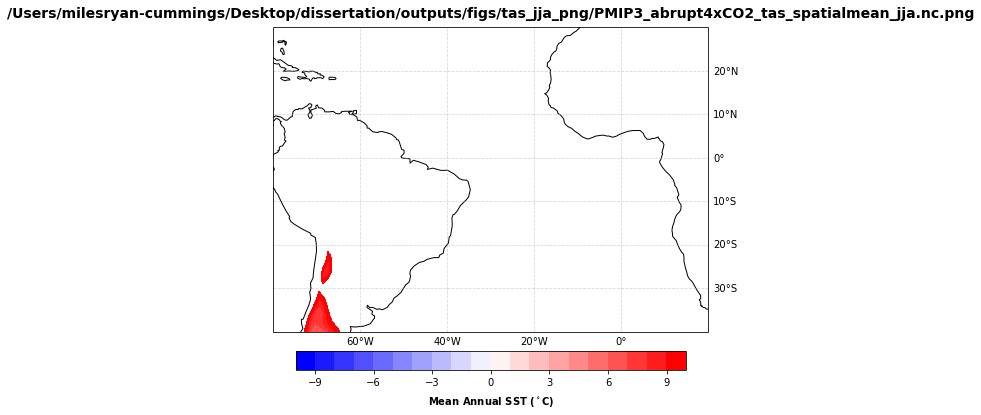

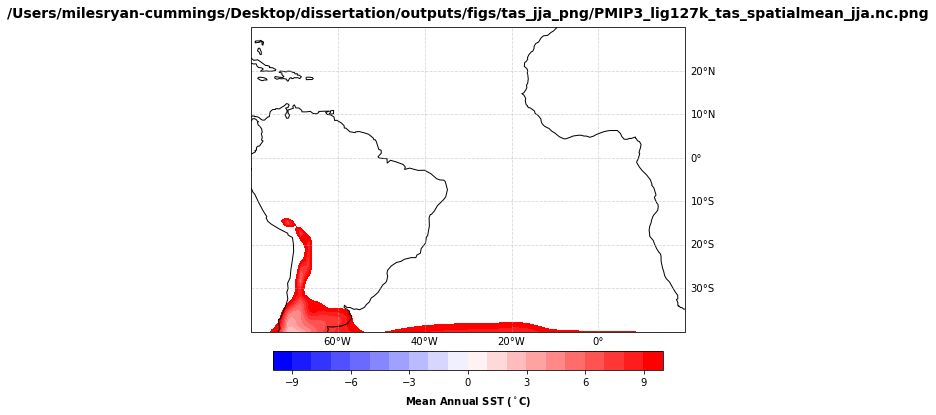

In [8]:
#open datasets
variable_name= 'tas_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/tas_jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/tas_jja_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot